<a href="https://colab.research.google.com/github/JulianaGertrudes/estagio-dados-itau/blob/main/Desafio_Estagio_Itau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação de bibliotecas ferramenta utilizada para análise e manipulação.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importação da base dados
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

Saving Ecommerce_DBS.csv to Ecommerce_DBS.csv


In [ ]:
# Identificando missing values
df.info()
df = df.replace({"SEM": np.nan})
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

In [ ]:
#Retirando colunas que não serão utilizadas
colunas_nao_utilizadas = ['Country','State','Latitude','Longituide','Customer ID']
df = df.drop(colunas_nao_utilizadas, axis=1)
display(df.head())

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source
0,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign
1,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign
2,23/05/2022,Home,288,2,3196,10,20,Male,NaN
3,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign
4,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign


In [ ]:
#Preenchimento dos missing valores utilizando Moda.
moda =  df = df.fillna(df.mode().iloc[0])
display(df.head())

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source
0,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign
1,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign
2,23/05/2022,Home,288,2,3196,10,20,Male,Instagram Campign
3,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign
4,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign


In [ ]:
#Roteiro de Analise
#Categoria mais vendida nos ultimos tres anos
data_inicio = '31/05/2021'
data_fim = '31/05/2024'
dados_filtrados = df[(df['Purchase Date'] >= data_inicio) & (df['Purchase Date'] <= data_fim)]
mais_vendido= dados_filtrados.groupby('Product Category')['Quantity'].idxmax()
print("Produto mais vendido:\n", mais_vendido)
print('\n')

#Produtos mais caro e mais barato
max_preco_idx = dados_filtrados['Product Price'].idxmax()
min_preco_idx = dados_filtrados['Product Price'].idxmin()
mais_caro = dados_filtrados.loc[max_preco_idx]
mais_barato = dados_filtrados.loc[min_preco_idx]
print("Produto mais caro:\n")
print(mais_caro)
print('\n')
print("Produto mais barato:\n")
print(mais_barato)

#Categoria mais e menos vendida
categoria = dados_filtrados['Product Category'].value_counts()
print('\n')
print("Vendas por categoria:\n")
print(categoria)
print('\n')
categoria_menos_vendida = categoria.idxmin()
print('\n')
print("Categoria menos vendida:", categoria_menos_vendida)

#Categoria mais e menos cara
categoria_mais_cara = dados_filtrados.groupby('Product Category')['Product Price'].max()
categoria_menos_cara = dados_filtrados.groupby('Product Category')['Product Price'].min()
print('\n')
print("Categoria mais cara:")
print(categoria_mais_cara)
print('\n')
print("Categoria menos cara:")
print(categoria_menos_cara)
print('\n')

#Melhor e pior NPS
melhor_nps = dados_filtrados['NPS'].idxmax()
pior_nps = dados_filtrados['NPS'].idxmin()
melhor_nps = dados_filtrados.loc[melhor_nps]
pior_nps = dados_filtrados.loc[pior_nps]
print("Produto com melhor NPS:\n")
print(melhor_nps)
print('\n')
print("Produto com pior NPS:\n")
print(pior_nps)
print('\n')

Produto mais vendido:
 Product Category
Books           1174
Clothing        3683
Electronics    16172
Home           56278
Name: Quantity, dtype: int64


Produto mais caro:

Purchase Date                   31/05/2021
Product Category                     Books
Product Price                          500
Quantity                                 1
Total Purchase Amount                 4218
NPS                                      5
Customer Age                            38
Gender                                Male
Source                   Instagram Campign
Name: 82523, dtype: object


Produto mais barato:

Purchase Date                   31/05/2022
Product Category               Electronics
Product Price                           10
Quantity                                 3
Total Purchase Amount                 3828
NPS                                      1
Customer Age                            60
Gender                                Male
Source                   Instagram Campign


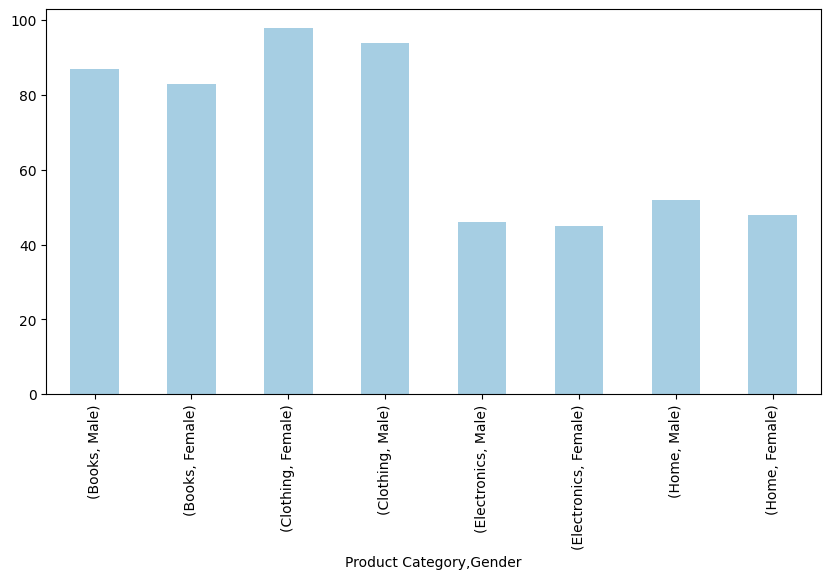

In [ ]:
dados_filtrados.groupby('Product Category')['Gender'].value_counts()
dados_filtrados.groupby('Product Category')['Gender'].value_counts().plot(kind= 'bar', stacked=True, figsize=(10,5), colormap='Paired')
plt.show()

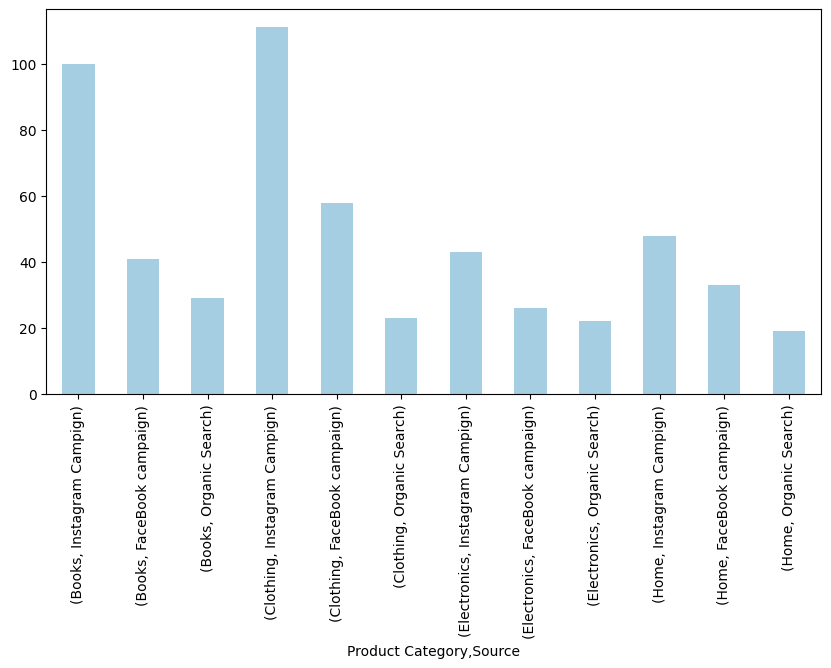

In [ ]:
dados_filtrados.groupby('Product Category')['Source'].value_counts()
dados_filtrados.groupby('Product Category')['Source'].value_counts().plot(kind= 'bar', stacked=True, figsize=(10,5), colormap='Paired')
plt.show()